Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
from functools import reduce   
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from pathlib import Path  
import sqlite3

In [3]:
# Import data from file
df_bikes = pd.read_csv('data/city_bikes.csv')
df_fsq = pd.read_csv('data/data_Foursquare.csv')
df_yelp = pd.read_csv('data/data_Yelp.csv')

In [4]:

df_bikes['lat-long'] = df_bikes['latitude'].astype(str) + ',' + df_bikes['longitude'].astype(str)
df_bikes.head(1)

,Unnamed: 0,latitude,longitude,free_bikes,stationsid,lat-long
0,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796"


In [42]:
#df_fsq.head(1)
#df_bikes = df_bikes.drop('ll', axis=1)
#df_bikes

Put your parsed results into a DataFrame

In [5]:
data_merge1 = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ['lat-long'], how='left'), 
                     [df_bikes, df_fsq, df_yelp])
data_merge1.head()   

,Unnamed: 0,latitude_x,longitude_x,free_bikes,stationsid,lat-long,fsq_id,cat_id,category_name_x,categories_x,...,rating_x,category_name_y,categories_y,name_y,latitude_y,longitude_y,address_y,city_y,country_y,rating_y
0,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4b12cd56f964a5206d8e23e3,13049.0,Diner,"[{'id': 13049, 'name': 'Diner', 'icon': {'pref...",...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4da22f3ad686b60c2bb1b428,13018.0,Pub,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",...,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",54b47574498e6b087d957fa2,13003.0,Bar,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",...,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",60ce6c2fe180036cc18a8b13,13010.0,Dive Bar,"[{'id': 13010, 'name': 'Dive Bar', 'icon': {'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4ea9b2c0cc217eb08e070a93,13031.0,Burger Joint,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_merge1.shape

(5815, 25)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [7]:
data_merge1.head()


,Unnamed: 0,latitude_x,longitude_x,free_bikes,stationsid,lat-long,fsq_id,cat_id,category_name_x,categories_x,...,rating_x,category_name_y,categories_y,name_y,latitude_y,longitude_y,address_y,city_y,country_y,rating_y
0,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4b12cd56f964a5206d8e23e3,13049.0,Diner,"[{'id': 13049, 'name': 'Diner', 'icon': {'pref...",...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4da22f3ad686b60c2bb1b428,13018.0,Pub,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",...,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",54b47574498e6b087d957fa2,13003.0,Bar,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",...,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",60ce6c2fe180036cc18a8b13,13010.0,Dive Bar,"[{'id': 13010, 'name': 'Dive Bar', 'icon': {'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4ea9b2c0cc217eb08e070a93,13031.0,Burger Joint,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_merge1.describe()


,Unnamed: 0,latitude_x,longitude_x,free_bikes,cat_id,popularity,rating_x,latitude_y,longitude_y,rating_y
count,5815.000000,5815.000000,5815.000000,5815.000000,5797.000000,5603.000000,4158.000000,0.0,0.0,0.0
mean,314.689940,43.662860,-79.395655,9.345314,13043.028463,0.937645,7.533959,NaN,NaN,NaN
std,189.892021,0.023114,0.047687,5.444163,1227.536670,0.098579,0.918956,NaN,NaN,NaN
min,0.000000,43.588077,-79.544491,0.000000,10000.000000,0.005156,4.900000,NaN,NaN,NaN
25%,150.000000,43.648711,-79.422968,5.000000,13006.000000,0.934133,6.900000,NaN,NaN,NaN
50%,303.000000,43.659880,-79.393990,9.000000,13018.000000,0.958295,7.600000,NaN,NaN,NaN
75%,485.000000,43.671771,-79.374161,13.000000,13035.000000,0.980098,8.200000,NaN,NaN,NaN
max,655.000000,43.788319,-79.123505,29.000000,19056.000000,0.996783,9.200000,NaN,NaN,NaN


In [9]:
data_merge1.nunique()

Unnamed: 0         656
latitude_x         653
longitude_x        655
free_bikes          28
stationsid         656
lat-long           656
fsq_id             700
cat_id              84
category_name_x     84
categories_x       275
name_x             644
address_x          691
city_x               7
country_x            1
popularity         623
rating_x            42
category_name_y      0
categories_y         0
name_y               0
latitude_y           0
longitude_y          0
address_y            0
city_y               0
country_y            0
rating_y             0
dtype: int64

In [10]:
data_merge1.isnull().sum()

Unnamed: 0            0
latitude_x            0
longitude_x           0
free_bikes            0
stationsid            0
lat-long              0
fsq_id               18
cat_id               18
category_name_x      18
categories_x         18
name_x               18
address_x            18
city_x               18
country_x            18
popularity          212
rating_x           1657
category_name_y    5815
categories_y       5815
name_y             5815
latitude_y         5815
longitude_y        5815
address_y          5815
city_y             5815
country_y          5815
rating_y           5815
dtype: int64

In [11]:
#Dropping irrelevant columns
data_merge1=data_merge1.drop(['category_name_y','categories_y','name_y','latitude_y','longitude_y','address_y','city_y','country_y','rating_y'],axis=1)

In [12]:
data_merge1.shape

(5815, 16)

In [13]:
#Checking the types of data
data_merge1.dtypes

Unnamed: 0           int64
latitude_x         float64
longitude_x        float64
free_bikes           int64
stationsid          object
lat-long            object
fsq_id              object
cat_id             float64
category_name_x     object
categories_x        object
name_x              object
address_x           object
city_x              object
country_x           object
popularity         float64
rating_x           float64
dtype: object

In [14]:
#Renaming the columns
data_merge1 = data_merge1.rename(columns={"latitude_x": "Latitude", "longitude_x": "Longitude", "category_name_x": "CategoryName", "categories_x": "Categories","name_x": "Name", "address_x": "Address", "city_x": "City", "country_x": "Country","rating_x": "Rating"})

In [15]:
#chack duplicate rows
duplicate_rows_data_merge1 = data_merge1[data_merge1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data_merge1.shape)

number of duplicate rows:  (0, 16)


In [16]:
#chack null value
print(data_merge1.isnull().sum())

Unnamed: 0         0
Latitude           0
Longitude          0
free_bikes         0
stationsid         0
lat-long           0
fsq_id            18
cat_id            18
CategoryName      18
Categories        18
Name              18
Address           18
City              18
Country           18
popularity       212
Rating          1657
dtype: int64


In [17]:
data_merge1.head(2)

,Unnamed: 0,Latitude,Longitude,free_bikes,stationsid,lat-long,fsq_id,cat_id,CategoryName,Categories,Name,Address,City,Country,popularity,Rating
0,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4b12cd56f964a5206d8e23e3,13049.0,Diner,"[{'id': 13049, 'name': 'Diner', 'icon': {'pref...",Occasions Restaurant,"30 Eastwood Rd (Gainsborough Road), Toronto ON...",Toronto,CA,0.963599,7.4
1,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4da22f3ad686b60c2bb1b428,13018.0,Pub,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",Queen's Head Pub,"1214 Queen St E (Leslie St), Toronto ON M4M 1L7",Toronto,CA,0.962753,5.6


In [18]:
#for null value of Rating replace with 0
data_merge1['Rating'] = data_merge1['Rating'].replace(np.nan, 0)
print(data_merge1.Rating.isnull().sum())

0


In [19]:
#for null value of Rating replace with 0
data_merge1['popularity'] = data_merge1['popularity'].replace(np.nan, 0)
print(data_merge1.Rating.isnull().sum())

0


In [20]:
print(data_merge1.isnull().sum())

Unnamed: 0       0
Latitude         0
Longitude        0
free_bikes       0
stationsid       0
lat-long         0
fsq_id          18
cat_id          18
CategoryName    18
Categories      18
Name            18
Address         18
City            18
Country         18
popularity       0
Rating           0
dtype: int64


[Text(0.5, 1.0, 'Rating number of bars for search location')]

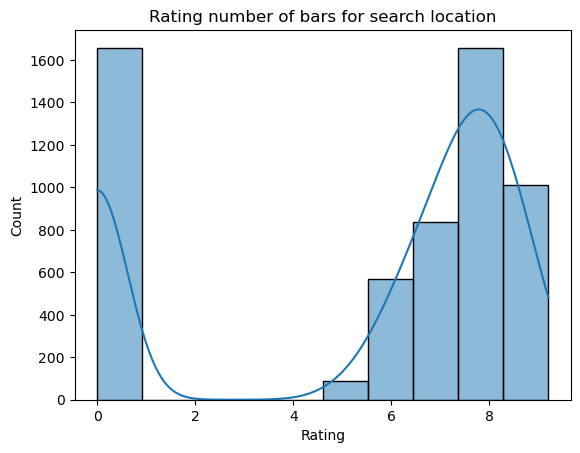

In [21]:
#Histogram
sns.histplot(data_merge1['Rating'],kde=True, bins=10).set(title='Rating number of bars for search location')

C:\Users\Danijela\AppData\Local\Temp\ipykernel_5840\2920923103.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= data_merge1.corr()


,Unnamed: 0,Latitude,Longitude,free_bikes,cat_id,popularity,Rating
Unnamed: 0,1.000000,0.121515,-0.071176,-0.054736,-0.015783,-0.147180,-0.088118
Latitude,0.121515,1.000000,0.245598,-0.317242,-0.023352,-0.263070,-0.226079
Longitude,-0.071176,0.245598,1.000000,0.080863,0.089642,0.060417,0.072650
free_bikes,-0.054736,-0.317242,0.080863,1.000000,0.042866,0.095142,0.118044
cat_id,-0.015783,-0.023352,0.089642,0.042866,1.000000,0.078665,0.101692
popularity,-0.147180,-0.263070,0.060417,0.095142,0.078665,1.000000,0.427643
Rating,-0.088118,-0.226079,0.072650,0.118044,0.101692,0.427643,1.000000


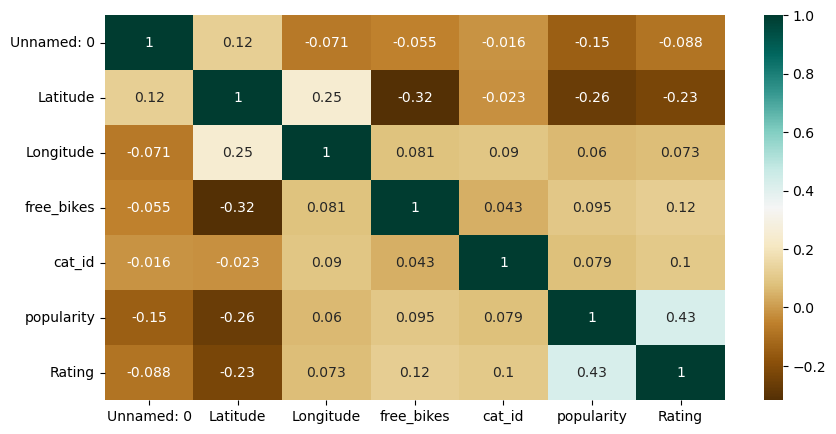

In [22]:
#Heat Maps

plt.figure(figsize=(10,5))
c= data_merge1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [23]:
filepath = Path('data/Mrge_table.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

data_merge1.to_csv(filepath)  
data_merge1.head(2)

,Unnamed: 0,Latitude,Longitude,free_bikes,stationsid,lat-long,fsq_id,cat_id,CategoryName,Categories,Name,Address,City,Country,popularity,Rating
0,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4b12cd56f964a5206d8e23e3,13049.0,Diner,"[{'id': 13049, 'name': 'Diner', 'icon': {'pref...",Occasions Restaurant,"30 Eastwood Rd (Gainsborough Road), Toronto ON...",Toronto,CA,0.963599,7.4
1,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4da22f3ad686b60c2bb1b428,13018.0,Pub,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",Queen's Head Pub,"1214 Queen St E (Leslie St), Toronto ON M4M 1L7",Toronto,CA,0.962753,5.6


Put your parsed results into a DataFrame

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [24]:

Path('data/Merge.db').touch()

In [25]:
conn = sqlite3.connect('data/Merge.db')
df = pd.read_csv('data/Mrge_table.csv')
c = conn.cursor()
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Latitude,Longitude,free_bikes,stationsid,lat-long,fsq_id,cat_id,CategoryName,Categories,Name,Address,City,Country,popularity,Rating
0,0,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4b12cd56f964a5206d8e23e3,13049.0,Diner,"[{'id': 13049, 'name': 'Diner', 'icon': {'pref...",Occasions Restaurant,"30 Eastwood Rd (Gainsborough Road), Toronto ON...",Toronto,CA,0.963599,7.4
1,1,0,43.665269,-79.319796,15,fb337bbed72e2be090071e199899b2be,"43.665269,-79.319796",4da22f3ad686b60c2bb1b428,13018.0,Pub,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",Queen's Head Pub,"1214 Queen St E (Leslie St), Toronto ON M4M 1L7",Toronto,CA,0.962753,5.6


In [27]:

df.to_sql('data', conn, if_exists='replace')
conn.execute('''create table my_table_1 as select * from data ''')
c = conn.cursor()

In [28]:
c.execute(''' SELECT * FROM my_table_1  ''') 
for row in c.fetchall():     
 print (row)

(0, 0, 0, 43.665269, -79.319796, 15, 'fb337bbed72e2be090071e199899b2be', '43.665269,-79.319796', '4b12cd56f964a5206d8e23e3', 13049.0, 'Diner', "[{'id': 13049, 'name': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suffix': '.png'}}, {'id': 13068, 'name': 'American Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]", 'Occasions Restaurant', '30 Eastwood Rd (Gainsborough Road), Toronto ON M4L 2C3', 'Toronto', 'CA', 0.9635992022081298, 7.4)
(1, 1, 0, 43.665269, -79.319796, 15, 'fb337bbed72e2be090071e199899b2be', '43.665269,-79.319796', '4da22f3ad686b60c2bb1b428', 13018.0, 'Pub', "[{'id': 13018, 'name': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]", "Queen's Head Pub", '1214 Queen St E (Leslie St), Toronto ON M4M

Look at the data before and after the join to validate your data.

In [29]:
#number of rows
c.execute(''' SELECT count(*) as row_num FROM my_table_1  ''') 
for row in c.fetchall():     
 print (row)

(5815,)


In [30]:
#number of columns
c.execute(''' SELECT COUNT(*)
FROM pragma_table_info('my_table_1') ''') 
for row in c.fetchall():     
 print (row)

(18,)


Preparing data for model building

In [34]:
#columns
c.execute('''PRAGMA table_info(my_table_1)
''') 
for row in c.fetchall():     
 print (row)

(0, 'index', 'INT', 0, None, 0)
(1, 'Unnamed: 0.1', 'INT', 0, None, 0)
(2, 'Unnamed: 0', 'INT', 0, None, 0)
(3, 'Latitude', 'REAL', 0, None, 0)
(4, 'Longitude', 'REAL', 0, None, 0)
(5, 'free_bikes', 'INT', 0, None, 0)
(6, 'stationsid', 'TEXT', 0, None, 0)
(7, 'lat-long', 'TEXT', 0, None, 0)
(8, 'fsq_id', 'TEXT', 0, None, 0)
(9, 'cat_id', 'REAL', 0, None, 0)
(10, 'CategoryName', 'TEXT', 0, None, 0)
(11, 'Categories', 'TEXT', 0, None, 0)
(12, 'Name', 'TEXT', 0, None, 0)
(13, 'Address', 'TEXT', 0, None, 0)
(14, 'City', 'TEXT', 0, None, 0)
(15, 'Country', 'TEXT', 0, None, 0)
(16, 'popularity', 'REAL', 0, None, 0)
(17, 'Rating', 'REAL', 0, None, 0)


In [60]:
c.execute('''select stationsid, free_bikes ,  min(free_bikes) , max(free_bikes)
from my_table_1
where CategoryName = 'Bar'
''') 
for row in c.fetchall():     
 print (row)

('02feaaef65cff4671fb1935179895659', 29, 0, 29)


In [66]:
c.execute('''select  stationsid, avg(free_bikes) as free_bikes, avg(Rating) as mean_Rating, min(Rating) as min_Rating, max(Rating) as max_Rating,
avg(CASE WHEN free_bikes>=0 and free_bikes<=14 THEN 0 
         WHEN free_bikes>=15 and  free_bikes<=30 THEN 1 
      end) OVER (PARTITION BY stationsid) AS busy_station
from my_table_1
where CategoryName = 'Bar'
group by stationsid
''') 
for row in c.fetchall():     
 print (row)

('01136ad859ed85b0b15029e1b1e702fc', 12.0, 8.8, 8.8, 8.8, 0.0)
('0153756b9e136b96e730aaa2f048227f', 9.0, 0.0, 0.0, 0.0, 0.0)
('019e5937c3fc120cee906770bca8fa69', 6.0, 0.0, 0.0, 0.0, 0.0)
('026bf7c2104a659ef0392f1c22bc6e17', 15.0, 3.925, 0.0, 7.9, 1.0)
('02d90c8ede19da66083e0d0e14d17258', 2.0, 0.0, 0.0, 0.0, 0.0)
('02feaaef65cff4671fb1935179895659', 29.0, 7.4, 7.4, 7.4, 1.0)
('033dd75f330fec10400341177c68036e', 22.0, 8.15, 7.4, 8.9, 1.0)
('03b565f085260e768988cd216fbeeef4', 6.0, 0.0, 0.0, 0.0, 0.0)
('03cb067499bb9bc86cf0c884edb403bc', 13.0, 6.324999999999999, 0.0, 9.1, 0.0)
('044fd938d016b91837e9b02be913b5c7', 7.0, 8.9, 8.9, 8.9, 0.0)
('045a7a6b973238dc76bc058e4f33f143', 15.0, 0.0, 0.0, 0.0, 1.0)
('049156f7c0e19a53a77d8310d93eed0c', 8.0, 6.9, 6.9, 6.9, 0.0)
('049c76540151608ec55bfcd0e1748f41', 14.0, 8.266666666666666, 6.8, 9.1, 0.0)
('04cadbe0f9b27f89f5fa6f6dbdea0883', 7.0, 7.866666666666667, 6.9, 9.1, 0.0)
('052763ac927bce9197aa6381f508576f', 14.0, 0.0, 0.0, 0.0, 0.0)
('068f5330e49bd72

In [69]:

df_for_model = pd.read_sql_query('''select  stationsid, avg(free_bikes) as free_bikes, avg(Rating) as mean_Rating, min(Rating) as min_Rating, max(Rating) as max_Rating,
avg(CASE WHEN free_bikes>=0 and free_bikes<=14 THEN 0 
         WHEN free_bikes>=15 and  free_bikes<=30 THEN 1 
      end) OVER (PARTITION BY stationsid) AS busy_station
from my_table_1
where CategoryName = 'Bar'
group by stationsid''', conn)
df_for_model

,stationsid,free_bikes,mean_Rating,min_Rating,max_Rating,busy_station
0,01136ad859ed85b0b15029e1b1e702fc,12.0,8.800000,8.8,8.8,0.0
1,0153756b9e136b96e730aaa2f048227f,9.0,0.000000,0.0,0.0,0.0
2,019e5937c3fc120cee906770bca8fa69,6.0,0.000000,0.0,0.0,0.0
3,026bf7c2104a659ef0392f1c22bc6e17,15.0,3.925000,0.0,7.9,1.0
4,02d90c8ede19da66083e0d0e14d17258,2.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
521,fc7fa6476f3fce587eeb9e2200faa005,9.0,3.700000,0.0,7.4,0.0
522,fe00988a883c9469b82d17221ef1824b,7.0,6.325000,0.0,8.5,0.0
523,fe806cf907683c67f4d2899eb4123f00,6.0,0.000000,0.0,0.0,0.0
524,fe97ae335b31b6c455f340f397904d38,7.0,3.000000,0.0,9.0,0.0


In [70]:
# Save csv

filepath = Path('data/data_for_model.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

df_for_model.to_csv(filepath, index=False) 
df_for_model.head(10)


,stationsid,free_bikes,mean_Rating,min_Rating,max_Rating,busy_station
0,01136ad859ed85b0b15029e1b1e702fc,12.0,8.800,8.8,8.8,0.0
1,0153756b9e136b96e730aaa2f048227f,9.0,0.000,0.0,0.0,0.0
2,019e5937c3fc120cee906770bca8fa69,6.0,0.000,0.0,0.0,0.0
3,026bf7c2104a659ef0392f1c22bc6e17,15.0,3.925,0.0,7.9,1.0
4,02d90c8ede19da66083e0d0e14d17258,2.0,0.000,0.0,0.0,0.0
5,02feaaef65cff4671fb1935179895659,29.0,7.400,7.4,7.4,1.0
6,033dd75f330fec10400341177c68036e,22.0,8.150,7.4,8.9,1.0
7,03b565f085260e768988cd216fbeeef4,6.0,0.000,0.0,0.0,0.0
8,03cb067499bb9bc86cf0c884edb403bc,13.0,6.325,0.0,9.1,0.0
9,044fd938d016b91837e9b02be913b5c7,7.0,8.900,8.9,8.9,0.0
